<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C2/W3/ungraded_lab/C2_W3_Lab_1_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Transfer Learning

In this lab, you will see how you can use a pre-trained model to achieve good results even with a small training dataset. This is called _transfer learning_ and you do this by leveraging the trained layers of an existing model and adding your own layers to fit your application. For example, you can:

1. just get the convolution layers of one model
2. attach some dense layers onto it
3. train just the dense network
4. evaluate the results

Doing this will allow you to save time building your application because you will essentially skip weeks of training time of very deep networks. You will just use the features it has learned and tweak it for your dataset. Let's see how these are done in the next sections.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running the notebook on your local machine might result in some of the code blocks throwing errors.

## Setup the pretrained model

You will need to prepare pretrained model and configure the layers that you need. For this exercise, you will use the convolution layers of the [InceptionV3](https://arxiv.org/abs/1512.00567) architecture as your base model. To do that, you need to:

1. Set the input shape to fit your application. In this case. set it to `150x150x3` as you've been doing in the last few labs.

2. Pick and freeze the convolution layers to take advantage of the features it has learned already.

3. Add dense layers which you will train.

Let's see how to do these in the next cells.

First, in preparing the input to the model, you want to fetch the pretrained weights of the `InceptionV3` model and remove the fully connected layer at the end because you will be replacing it later. You will also specify the input shape that your model will accept. Lastly, you want to freeze the weights of these layers because they have been trained already.

In [ ]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers


# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

You can see the summary of the model below. You can see that it is a very deep network. You can then select up to which point of the network you want to use. As Laurence showed in the exercise, you will use up to `mixed_7` as your base model and add to that. This is because the original last layer might be too specialized in what it has learned so it might not translate well into your application. `mixed_7` on the other hand will be more generalized and you can start with that for your application. After the exercise, feel free to modify and use other layers to see what the results you get.

In [ ]:
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
==================================================================================================
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 74, 74, 32)   0           ['batch_normalization[0][0]']    
                                                                                                  
 conv2d_1 (Conv2D)              (None, 72, 72, 32)   9216        ['activation[0][0]']             
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 72, 72, 32)  96          ['conv2d_1[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_1 (Activation)      (None, 72, 72, 32)   0           ['batch_normalization_1[0][0]']  
                                                                                                  
 conv2d_2 (Conv2D)              (None, 72, 72, 64)   18432       ['activation_1[0][0]']           
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 72, 72, 64)  192         ['conv2d_2[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_2 (Activation)      (None, 72, 72, 64)   0           ['batch_normalization_2[0][0]']  
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 35, 35, 64)   0           ['activation_2[0][0]']           
                                                                                                  
 conv2d_3 (Conv2D)              (None, 35, 35, 80)   5120        ['max_pooling2d[0][0]']          
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 35, 35, 80)  240         ['conv2d_3[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_3 (Activation)      (None, 35, 35, 80)   0           ['batch_normalization_3[0][0]']  
                                                                                                  
 conv2d_4 (Conv2D)              (None, 33, 33, 192)  138240      ['activation_3[0][0]']           
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 33, 33, 192)  576        ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_4 (Activation)      (None, 33, 33, 192)  0           ['batch_normalization_4[0][0]']  
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 192)  0          ['activation_4[0][0]']           
                                                                                                  
 conv2d_8 (Conv2D)              (None, 16, 16, 64)   12288       ['max_pooling2d_1[0][0]']        
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 16, 16, 64)  192         ['conv2d_8[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_8 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_8[0][0]']  
                                                                                                  
 conv2d_6 (Conv2D)              (None, 16, 16, 48)   9216        ['max_pooling2d_1[0][0]']        
                                                                                                  
 conv2d_9 (Conv2D)              (None, 16, 16, 96)   55296       ['activation_8[0][0]']           
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 16, 16, 48)  144         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 16, 16, 96)  288         ['conv2d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 16, 16, 48)   0           ['batch_normalization_6[0][0]']  
                                                                                                  
 activation_9 (Activation)      (None, 16, 16, 96)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 average_pooling2d (AveragePool  (None, 16, 16, 192)  0          ['max_pooling2d_1[0][0]']        
 ing2D)                                                                                           
                                                                                                  
 conv2d_5 (Conv2D)              (None, 16, 16, 64)   12288       ['max_pooling2d_1[0][0]']        
                                                                                                  
 conv2d_7 (Conv2D)              (None, 16, 16, 64)   76800       ['activation_6[0][0]']           
                                                                                                  
 conv2d_10 (Conv2D)             (None, 16, 16, 96)   82944       ['activation_9[0][0]']           
                                                                                                  
 conv2d_11 (Conv2D)             (None, 16, 16, 32)   6144        ['average_pooling2d[0][0]']      
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 16, 16, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 16, 16, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_10 (Activation)     (None, 16, 16, 96)   0           ['batch_normalization_10[0][0]'] 
                                                                                                  
 activation_11 (Activation)     (None, 16, 16, 32)   0           ['batch_normalization_11[0][0]'] 
                                                                                                  
 mixed0 (Concatenate)           (None, 16, 16, 256)  0           ['activation_5[0][0]',           
                                                                  'activation_7[0][0]',           
                                                                  'activation_10[0][0]',          
                                                                  'activation_11[0][0]']          
                                                                                                  
 conv2d_15 (Conv2D)             (None, 16, 16, 64)   16384       ['mixed0[0][0]']                 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 16, 16, 64)  192         ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_15 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_15[0][0]'] 
                                                                                                  
 conv2d_13 (Conv2D)             (None, 16, 16, 48)   12288       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_16 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_15[0][0]']          
                                                                                                  
 batch_normalization_13 (BatchN  (None, 16, 16, 48)  144         ['conv2d_13[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_16 (BatchN  (None, 16, 16, 96)  288         ['conv2d_16[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_13 (Activation)     (None, 16, 16, 48)   0           ['batch_normalization_13[0][0]'] 
                                                                                                  
 activation_16 (Activation)     (None, 16, 16, 96)   0           ['batch_normalization_16[0][0]'] 
                                                                                                  
 average_pooling2d_1 (AveragePo  (None, 16, 16, 256)  0          ['mixed0[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_12 (Conv2D)             (None, 16, 16, 64)   16384       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_14 (Conv2D)             (None, 16, 16, 64)   76800       ['activation_13[0][0]']          
                                                                                                  
 conv2d_17 (Conv2D)             (None, 16, 16, 96)   82944       ['activation_16[0][0]']          
                                                                                                  
 conv2d_18 (Conv2D)             (None, 16, 16, 64)   16384       ['average_pooling2d_1[0][0]']    
                                                                                                  
 batch_normalization_12 (BatchN  (None, 16, 16, 64)  192         ['conv2d_12[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_14 (BatchN  (None, 16, 16, 64)  192         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_17 (BatchN  (None, 16, 16, 96)  288         ['conv2d_17[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_18 (BatchN  (None, 16, 16, 64)  192         ['conv2d_18[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_12 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_12[0][0]'] 
                                                                                                  
 activation_14 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_14[0][0]'] 
                                                                                                  
 activation_17 (Activation)     (None, 16, 16, 96)   0           ['batch_normalization_17[0][0]'] 
                                                                                                  
 activation_18 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 mixed1 (Concatenate)           (None, 16, 16, 288)  0           ['activation_12[0][0]',          
                                                                  'activation_14[0][0]',          
                                                                  'activation_17[0][0]',          
                                                                  'activation_18[0][0]']          
                                                                  

In [ ]:
# Choose `mixed_7` as the last layer of your base model
# model이 너무 deep 하니까 mixed_1 ~ 10 까지 있는 거를 mixed_7에서 끊어 버리기
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)

## Add dense layers for your classifier

Next, you will add dense layers to your model. These will be the layers that you will train and is tasked with recognizing cats and dogs. You will add a [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layer as well to regularize the output and avoid overfitting.

In [ ]:
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

                                                                                                 
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_61 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_61[0][0]'] 
                                                                                                  
 activation_66 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_66[0][0]'] 
                                                                                                  
 conv2d_62 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_61[0][0]']          
                                                                                                  
 conv2d_67 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_66[0][0]']          
                                                                                                  
 batch_normalization_62 (BatchN  (None, 7, 7, 192)   576         ['conv2d_62[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_67 (BatchN  (None, 7, 7, 192)   576         ['conv2d_67[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_62 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_62[0][0]'] 
                                                                                                  
 activation_67 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_67[0][0]'] 
                                                                                                  
 average_pooling2d_6 (AveragePo  (None, 7, 7, 768)   0           ['mixed6[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_60 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_63 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_62[0][0]']          
                                                                                                  
 conv2d_68 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_67[0][0]']          
                                                                                                  
 conv2d_69 (Conv2D)             (None, 7, 7, 192)    147456      ['average_pooling2d_6[0][0]']    
                                                                                                  
 batch_normalization_60 (BatchN  (None, 7, 7, 192)   576         ['conv2d_60[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_63 (BatchN  (None, 7, 7, 192)   576         ['conv2d_63[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_68 (BatchN  (None, 7, 7, 192)   576         ['conv2d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_69 (BatchN  (None, 7, 7, 192)   576         ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_60 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_60[0][0]'] 
                                                                                                  
 activation_63 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_63[0][0]'] 
                                                                                                  
 activation_68 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_68[0][0]'] 
                                                                                                  
 activation_69 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 mixed7 (Concatenate)           (None, 7, 7, 768)    0           ['activation_60[0][0]',          
                                                                  'activation_63[0][0]',          
                                                                  'activation_68[0][0]',          
                                                                  'activation_69[0][0]']          
                                                                                                  
 flatten (Flatten)              (None, 37632)        0           ['mixed7[0][0]']                 
                                                                                                  
 dense (Dense)                  (None, 1024)         38536192    ['flatten[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 1024)         0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 1)            1025        ['dropout[0][0]']                
                                                                                                  
==================================================================================================
Total params: 47,512,481
Trainable params: 38,537,217
Non-trainable params: 8,975,264
__________________________________________________________________________________________________

In [ ]:
# Set the training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

## Prepare the dataset

Now you will prepare the dataset. This is basically the same code as the one you used in the data augmentation lab.

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

In [ ]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

# Define our example directories and files
base_dir = 'tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') 

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') 

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.

## Train the model

With that, you can now train the model. You will do 20 epochs and plot the results afterwards.

In [ ]:
# Train the model.
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 34s - loss: 0.3194 - accuracy: 0.8635 - val_loss: 0.1081 - val_accuracy: 0.9600 - 34s/epoch - 338ms/step
Epoch 2/20
100/100 - 18s - loss: 0.2358 - accuracy: 0.9095 - val_loss: 0.1065 - val_accuracy: 0.9610 - 18s/epoch - 185ms/step
Epoch 3/20
100/100 - 18s - loss: 0.2078 - accuracy: 0.9225 - val_loss: 0.1035 - val_accuracy: 0.9610 - 18s/epoch - 185ms/step
Epoch 4/20
100/100 - 19s - loss: 0.2003 - accuracy: 0.9235 - val_loss: 0.1412 - val_accuracy: 0.9580 - 19s/epoch - 190ms/step
Epoch 5/20
100/100 - 18s - loss: 0.1882 - accuracy: 0.9320 - val_loss: 0.1598 - val_accuracy: 0.9480 - 18s/epoch - 184ms/step
Epoch 6/20
100/100 - 18s - loss: 0.1741 - accuracy: 0.9340 - val_loss: 0.1188 - val_accuracy: 0.9660 - 18s/epoch - 183ms/step
Epoch 7/20
100/100 - 18s - loss: 0.1539 - accuracy: 0.9435 - val_loss: 0.1094 - val_accuracy: 0.9690 - 18s/epoch - 183ms/step
Epoch 8/20
100/100 - 18s - loss: 0.1523 - accuracy: 0.9500 - val_loss: 0.1479 - val_accuracy: 0.9540 - 18s/epoch - 182ms/step
Epoch 9/20
100/100 - 18s - loss: 0.1609 - accuracy: 0.9445 - val_loss: 0.1299 - val_accuracy: 0.9630 - 18s/epoch - 184ms/step
Epoch 10/20
100/100 - 18s - loss: 0.1574 - accuracy: 0.9430 - val_loss: 0.1164 - val_accuracy: 0.9630 - 18s/epoch - 181ms/step
Epoch 11/20
100/100 - 18s - loss: 0.1589 - accuracy: 0.9480 - val_loss: 0.1179 - val_accuracy: 0.9640 - 18s/epoch - 183ms/step
Epoch 12/20
100/100 - 18s - loss: 0.1377 - accuracy: 0.9525 - val_loss: 0.1553 - val_accuracy: 0.9660 - 18s/epoch - 184ms/step
Epoch 13/20
100/100 - 18s - loss: 0.1434 - accuracy: 0.9490 - val_loss: 0.1491 - val_accuracy: 0.9610 - 18s/epoch - 183ms/step
Epoch 14/20
100/100 - 18s - loss: 0.1625 - accuracy: 0.9500 - val_loss: 0.1360 - val_accuracy: 0.9640 - 18s/epoch - 182ms/step
Epoch 15/20
100/100 - 18s - loss: 0.1410 - accuracy: 0.9495 - val_loss: 0.1398 - val_accuracy: 0.9610 - 18s/epoch - 184ms/step
Epoch 16/20
100/100 - 18s - loss: 0.1401 - accuracy: 0.9510 - val_loss: 0.1367 - val_accuracy: 0.9650 - 18s/epoch - 183ms/step
Epoch 17/20
100/100 - 18s - loss: 0.1378 - accuracy: 0.9535 - val_loss: 0.1467 - val_accuracy: 0.9680 - 18s/epoch - 181ms/step
Epoch 18/20
100/100 - 20s - loss: 0.1460 - accuracy: 0.9525 - val_loss: 0.1638 - val_accuracy: 0.9580 - 20s/epoch - 199ms/step
Epoch 19/20
100/100 - 19s - loss: 0.1237 - accuracy: 0.9560 - val_loss: 0.1300 - val_accuracy: 0.9670 - 19s/epoch - 192ms/step
Epoch 20/20
100/100 - 18s - loss: 0.1296 - accuracy: 0.9550 - val_loss: 0.1390 - val_accuracy: 0.9720 - 18s/epoch - 183ms/step

## Evaluate the results

You will use the same code to plot the results. As you can see, the validation accuracy is also trending upwards as your training accuracy improves. This is a good sign that your model is no longer overfitting!

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

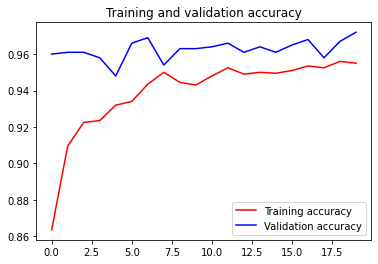
